# Herramientas para la visualización de los datos

<img src="img\datos.jpg" alt="Spyder" width="700"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_auto=pd.read_csv("Datasets/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


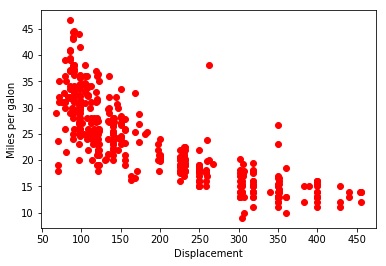

In [3]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()

## Altair

In [4]:
#!pip install altair vega_datasets

In [5]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

source = data.cars()
source.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [6]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Acceleration        406 non-null float64
Cylinders           406 non-null int64
Displacement        406 non-null float64
Horsepower          400 non-null float64
Miles_per_Gallon    398 non-null float64
Name                406 non-null object
Origin              406 non-null object
Weight_in_lbs       406 non-null int64
Year                406 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.6+ KB


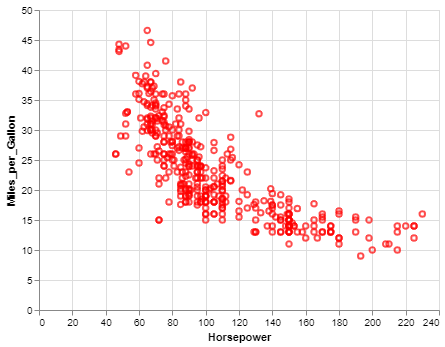

In [7]:
# Creando la gráfica de dispersión:

alt.Chart(source).mark_point(color="red").encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

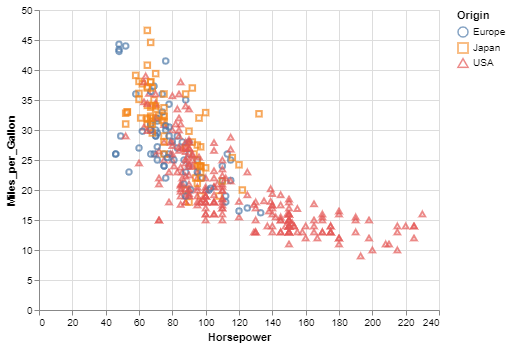

In [8]:
# Pesonalizando la gráfica de dispersión:

alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

# https://altair-viz.github.io/user_guide/encoding.html

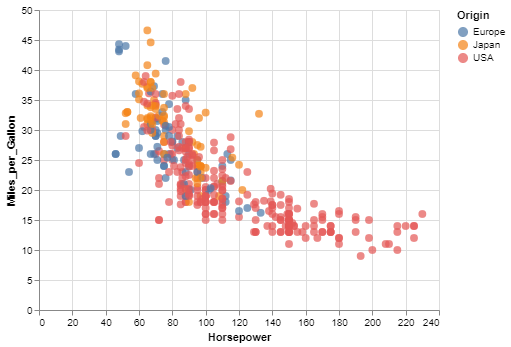

In [9]:
# Animando la gráfica de dispersión:

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',            # Valores para el eje de las x
    y='Miles_per_Gallon',      # Valores para el eje de las y
    color='Origin',            # Valores para la clasificación de los marcadores
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
                               # Valores para la etiqueta que aparece sobre los marcadores
).interactive()                # Este método permite que la gráfica sea dinámica

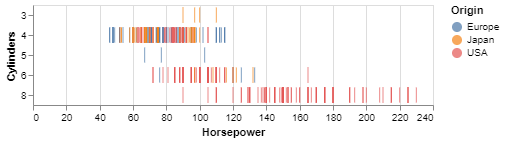

In [10]:
alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

### Encoding para los tipos de datos en altair

<table>
  <tr>
    <th>Tipo de dato</th>
    <th>Código de comando</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Cuantitativo</td>
    <td>Q</td>
    <td>Valor continuo real</td>
  </tr>
  <tr>
    <td>Ordinal</td>
    <td>O</td>
    <td>Cantidad discreta ordenada</td>
  </tr>
  <tr>
    <td>Nominal</td>
    <td>N</td>
    <td>Categoria discreta sin ordenar</td>
  </tr>
  <tr>
    <td>Temporal</td>
    <td>T</td>
    <td>Valores de tiempo</td>
  </tr>
  <tr>
    <td>Geojson</td>
    <td>G</td>
    <td>Froma geográfica</td>
  </tr>
</table>

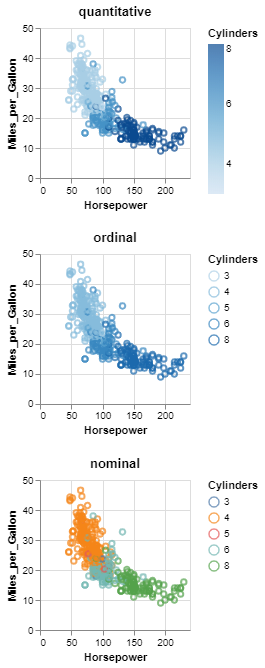

In [11]:
base = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(
    width=150,
    height=150
)

alt.vconcat(
   base.encode(color='Cylinders:Q').properties(title='quantitative'),
   base.encode(color='Cylinders:O').properties(title='ordinal'),
   base.encode(color='Cylinders:N').properties(title='nominal'),
)

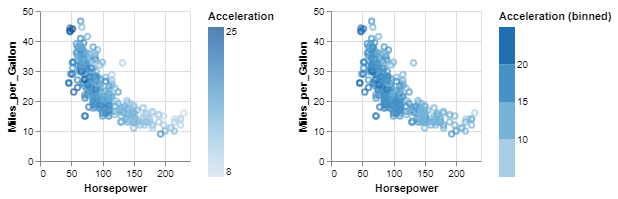

In [12]:
# Agrupando los valores del termómetro

base = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(
    width=150,
    height=150
)

alt.hconcat(
   base.encode(color=alt.Color('Acceleration:Q')),
   base.encode(color=alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=5))
))

## Interactuando con el gráfico

### Selecciónando regiones del gráfico

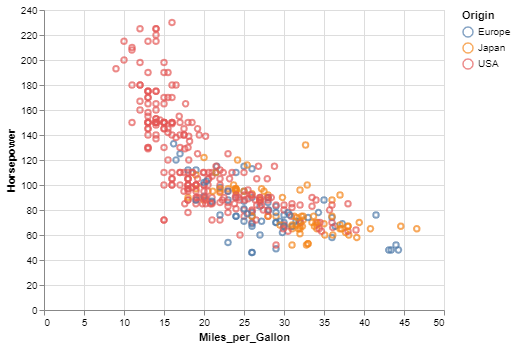

In [13]:
# Para poder seleccionar regiones del gráfico, es necesario agregar:
# 1. El objeto seleccionador (brush)
# 2. El método add_selection a la gráfica.


brush = alt.selection_interval()  # Instancia para el objeto seleccionador


alt.Chart(source).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color="Origin:N"
).add_selection(brush) # Agregando el seleccionador a la gráfica

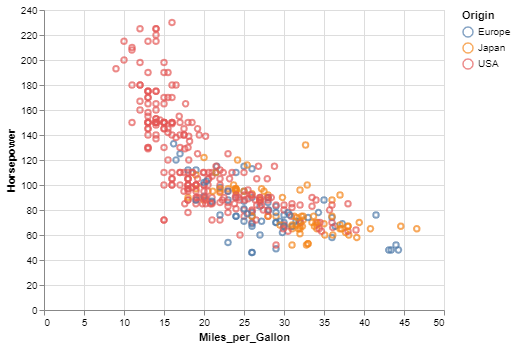

In [14]:
# Para obtener una respuesta a la interacción con el brush,
# será necesario agregar una condición. Esto lo hacemos
# mediante el método condition:

brush = alt.selection_interval()


alt.Chart(source).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(brush)

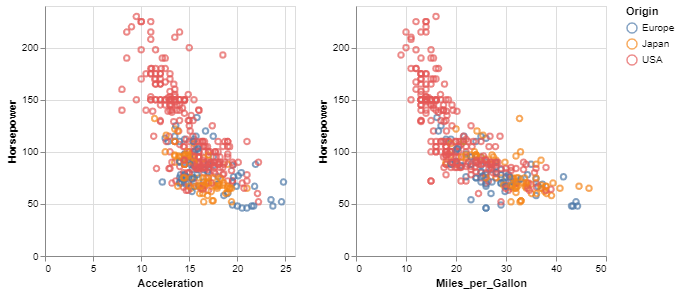

In [15]:
brush = alt.selection_interval()

chart = alt.Chart(source).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

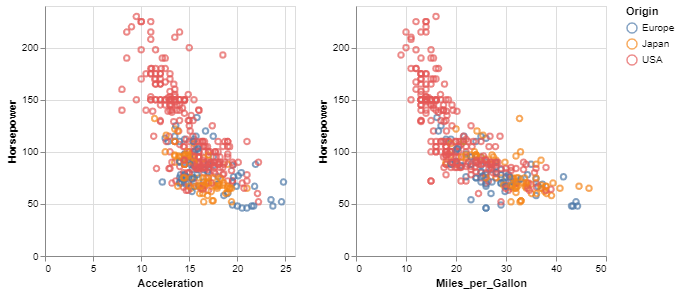

In [19]:
# Fijando la selección al eje de las X

brush = alt.selection_interval(encodings=['x'])

chart = alt.Chart(source).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

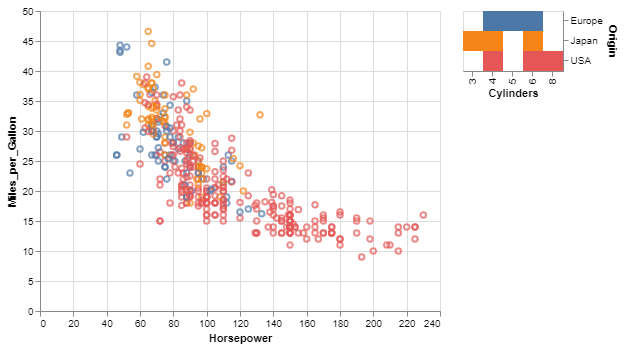

In [23]:
# Modificar el cuadro de Leyendas para que funcione como filtro:

selection = alt.selection_multi(fields=['Origin', 'Cylinders'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(source).mark_rect().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    x='Cylinders:O',
    color=color
).add_selection(
    selection
)

scatter | legend

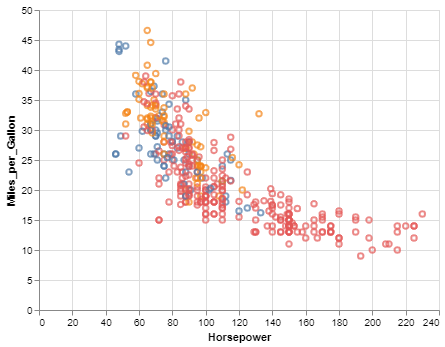

In [24]:
# Menu de selección:

input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
).add_selection(
    selection
)

# Storytelling

El storytelling se ha popularizado en el marketing como una herramienta para conectarse con las audiencias, salirse de la manera acartonada y fría de hablar de negocios, y lograr mayor empatía con clientes potenciales.

**Principales ventajas:**

* Generan confianza.

* Fáciles de contar.

* Brinda contexto a los datos.

* Crean mayor conexión.

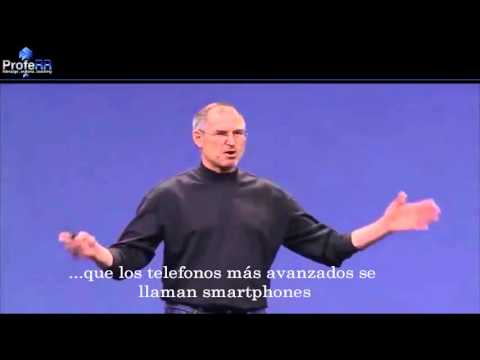

In [36]:
from IPython.display import YouTubeVideo

url="jiO0dKIQwCo"
YouTubeVideo(id=url,width=500,height=300)


### Aspectos clave del storytelling

* ¿Que nos inspira?

* ¿Cómo surgio la idea?

* Obstáculos superados.

* Target audience.

In [38]:
import altair as alt
from vega_datasets import data

data = data.population.url

data

'https://vega.github.io/vega-datasets/data/population.json'

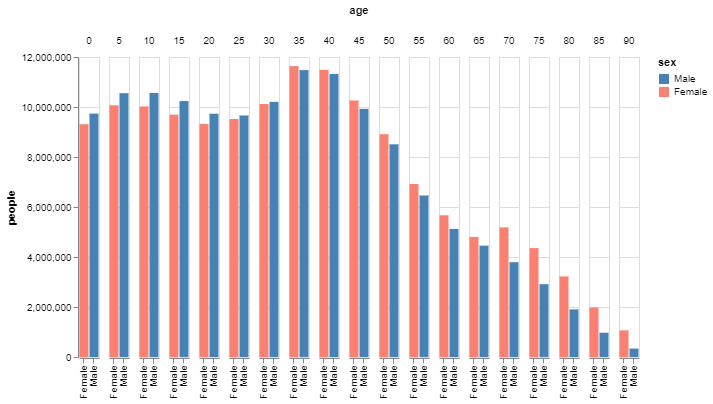

In [40]:
pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2000})

alt.Chart(data).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

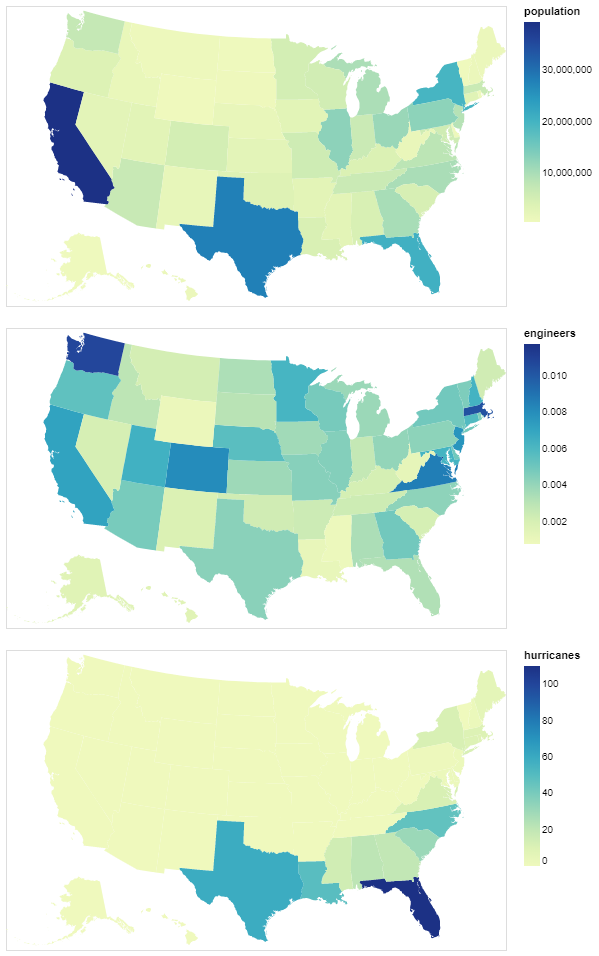

In [74]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

In [63]:
#conda install geopandas
#!pip install descartes

In [64]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [65]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [66]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [67]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


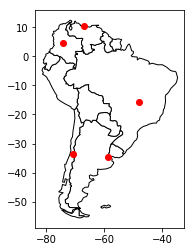

In [68]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [73]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [71]:
mexico=world[world.name == 'Mexico']
mexico

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


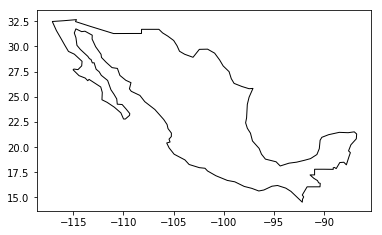

In [72]:
ax = mexico.plot(color='white', edgecolor='black')
plt.show()

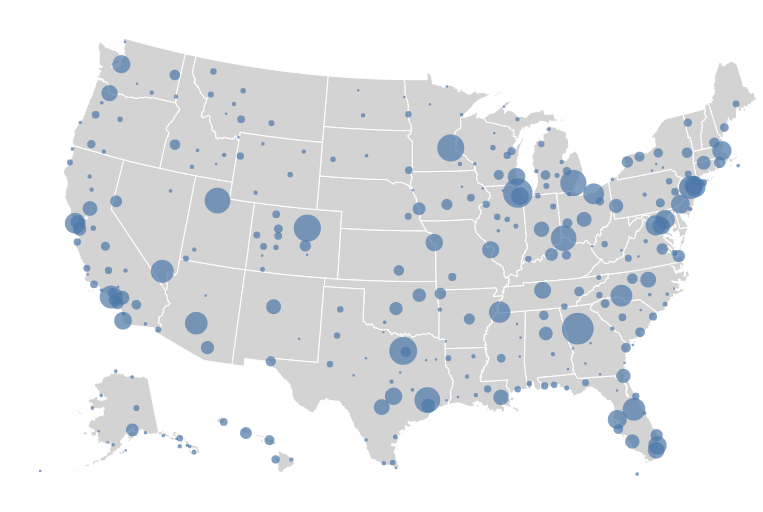

In [75]:
import altair as alt
from vega_datasets import data

# Importando el mapa y los datos
airports = data.airports.url
flights_airport = data.flights_airport.url

states = alt.topo_feature(data.us_10m.url, feature="states")

# Creando la propiedad de selección a traves del movimiento del mouse
select_city = alt.selection_single(
    on="mouseover", nearest=True, fields=["origin"], empty="none"
)

# Definiendo los atributos a buscar en la data de aeropuertos
lookup_data = alt.LookupData(
    airports, key="iata", fields=["state", "latitude", "longitude"]
)

# Creando el mapa de fondo
background = alt.Chart(states).mark_geoshape(
    fill="lightgray",
    stroke="white"
).properties(
    width=750,
    height=500
).project("albersUsa")

# Creando las conexiones
connections = alt.Chart(flights_airport).mark_rule(opacity=0.35).encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    latitude2="lat2:Q",
    longitude2="lon2:Q"
).transform_lookup(
    lookup="origin",
    from_=lookup_data
).transform_lookup(
    lookup="destination",
    from_=lookup_data,
    as_=["state", "lat2", "lon2"]
).transform_filter(
    select_city
)

# Creando los puntos donde estarán los aeropuertos
points = alt.Chart(flights_airport).mark_circle().encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    size=alt.Size("routes:Q", scale=alt.Scale(range=[0, 1000]), legend=None),
    order=alt.Order("routes:Q", sort="descending"),
    tooltip=["origin:N", "routes:Q"]
).transform_aggregate(
    routes="count()",
    groupby=["origin"]
).transform_lookup(
    lookup="origin",
    from_=lookup_data
).transform_filter(
    (alt.datum.state != "PR") & (alt.datum.state != "VI")
).add_selection(
    select_city
)

# Juntando todo y graficando
(background + connections + points).configure_view(stroke=None)